# Default of credit card clients

### Table of Contents

1. Loading the data
2. Preprocessing the data
3. Explore features or charecteristics to predict default of credit card clients
4. Develop prediction models
5. Evaluate and refine prediction models

### Project Overview

This Project aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

I worked with the project in Default of credit card clients. I focused on predicting the Default list of customer. I followed a process of problem definition, gathering data, preparing data, explanatory data analysis, coming up with a data model, validating the model, and optimizing the model further.

Let's take a look at the steps


### Data Science Steps

1. Problem Definition: What factors determined whether someone survived a disaster? Using passenger data, we were able to identify certain groups of people who were more likely to survive.
2. Data Gathering: Kaggle provided the input data on their website.
3. Data Preparation: I prepared the data by analyzing data points that were missing or outliers.
4. EDA (Exploratory Data Analysis): If you input garbage data into a system, you'll get garbage output. Therefore, it is important to use descriptive and graphical statistics to look for patterns, correlations and comparisons in the dataset. In this step, I analyzed the data to make sure it was understandable.
5. Data Modeling: It is important to know when to select a model. If we choose the wrong model for a particular use case, all other steps become pointless.
6. Validate Model: After training the model, I checked its performance and looked for any issues with overfitting or underfitting.
7. Optimize Model: Using techniques like hyperparameter optimization, I worked on making the model better.



### Step 1: Problem Definition

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among different models methods.



### Step 2: Data Gathering
The dataset can be found on found on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

### Step 3: Data Preperation

The data was pre-processed, so I only focused on cleaning it up further.



#### 3.1 Import Libraries


In [62]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.4
matplotlib version: 3.5.2
NumPy version: 1.21.5
SciPy version: 1.9.1
IPython version: 7.31.1
scikit-learn version: 1.2.2
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_auc_score

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 30)

#### 3.2 Pre-view of the Data


The default payment next month variable is the outcome or dependent variable. The datatype is 1 if the customer default and 0 if they did not default. The rest of the variables are independent variables. Most variable names are self explanatory but a couple may be worth mentioning. The LIMIT_BAL represents Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.Pay_6 to Pay_0 is the History of past payment. We tracked the past monthly payment records (from April to September, 2005).similarly for BILL_AMT & PAY_AMT columns respectively.

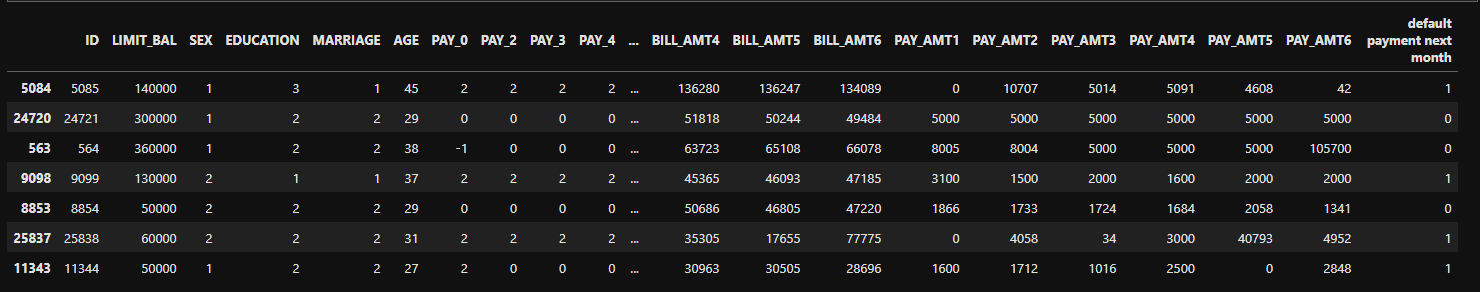

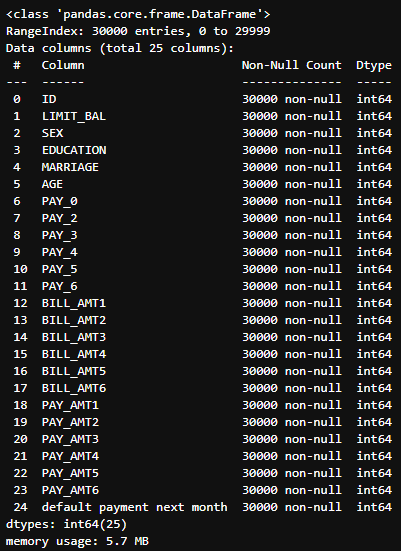

[image.png](attachment:f813f3f5-b78b-4efb-8aae-72761f96817c.png)
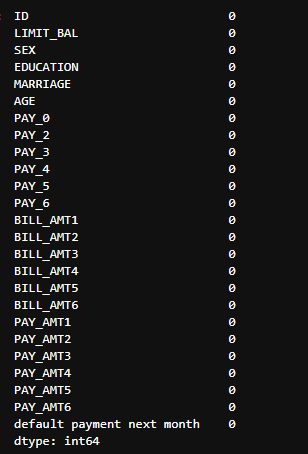

Check for missing values

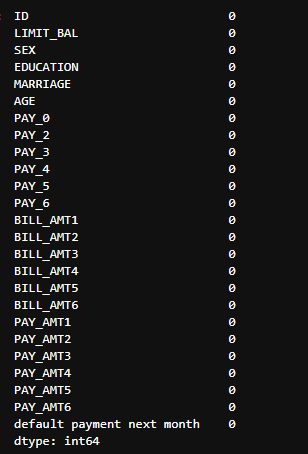

Ratio between Male and female (1 = male; 2 = female)

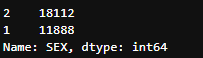

#### 3.3 Data Pre-processing:


##### Rename Columns by month

PAY_0 to PAY_6 history of past payment. We tracked the past monthly payment records (from April to September, 2005), similarly for BILL_AMT & PAY_AMT columns respectively.

To change the columns accordingly to respective month to get clear idea of what the features does.  
- PAY_0,	PAY_2,	PAY_3,	PAY_4,	PAY_5,	PAY_6 changed to PAY_September,	PAY_August,	PAY_July,	PAY_June, PAY_May, PAY_April
- BILL_AMT1,	BILL_AMT2,	BILL_AMT3,	BILL_AMT4,	BILL_AMT5,	BILL_AMT6, to BILL_AMT_September,	BILL_AMT_August,	BILL_AMT_July,	BILL_AMT_June,	BILL_AMT_May,	BILL_AMT_April
- PAY_AMT1,	PAY_AMT2,	PAY_AMT3,	PAY_AMT4,	PAY_AMT5,	PAY_AMT6, to PAY_AMT_September,	PAY_AMT_August,	PAY_AMT_July,	PAY_AMT_June,	PAY_AMT_May,	PAY_AMT_April
- Rename the Target column to avoid space/column length


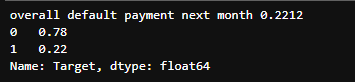

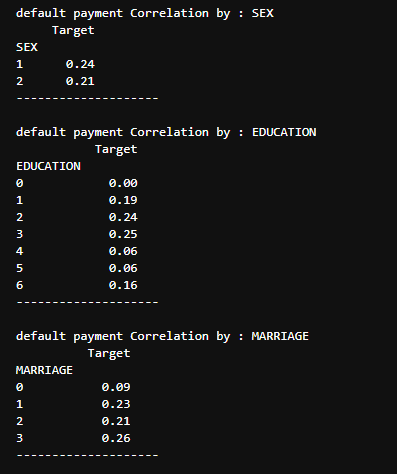

Rounding the value to four categories to understand easily

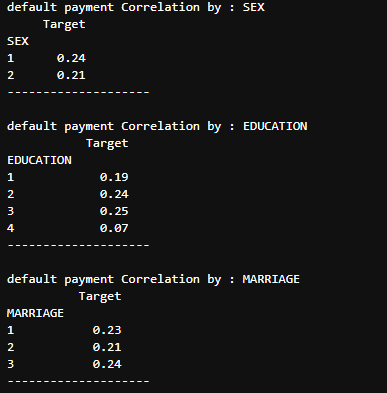

### Step 4: Explanatory Data Analysis (EDA)

- Below graph shows Male mosty get defaulted than Female
- highschool gets defaulted than other categories 
- Married person get defaulted than single 


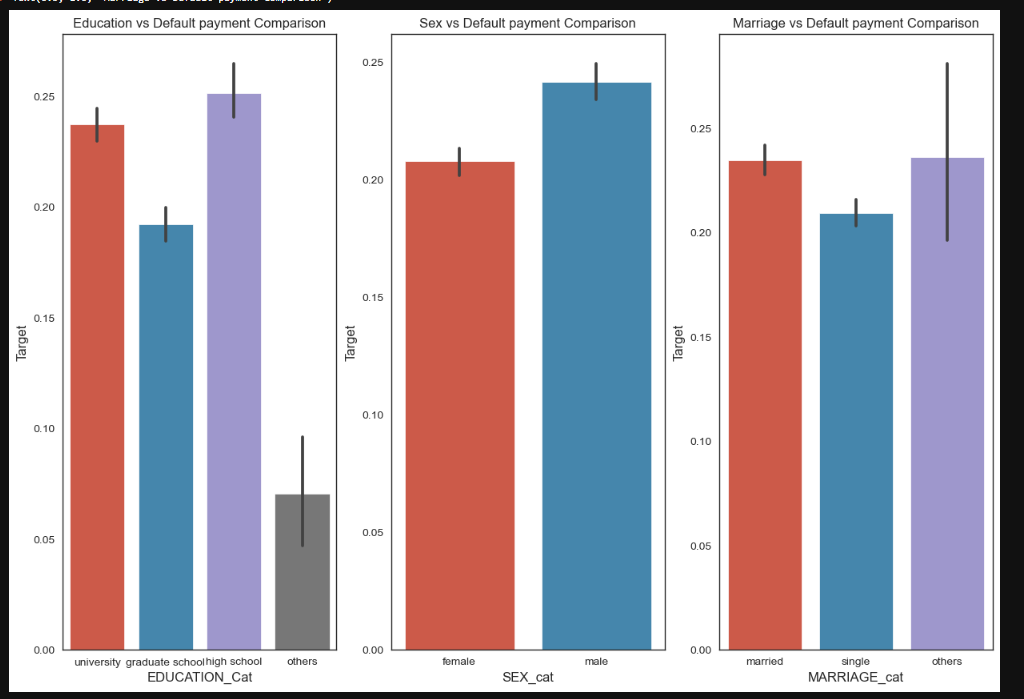

Male at all age bins get defaulted than Female
as we seen above married male gets default than married female
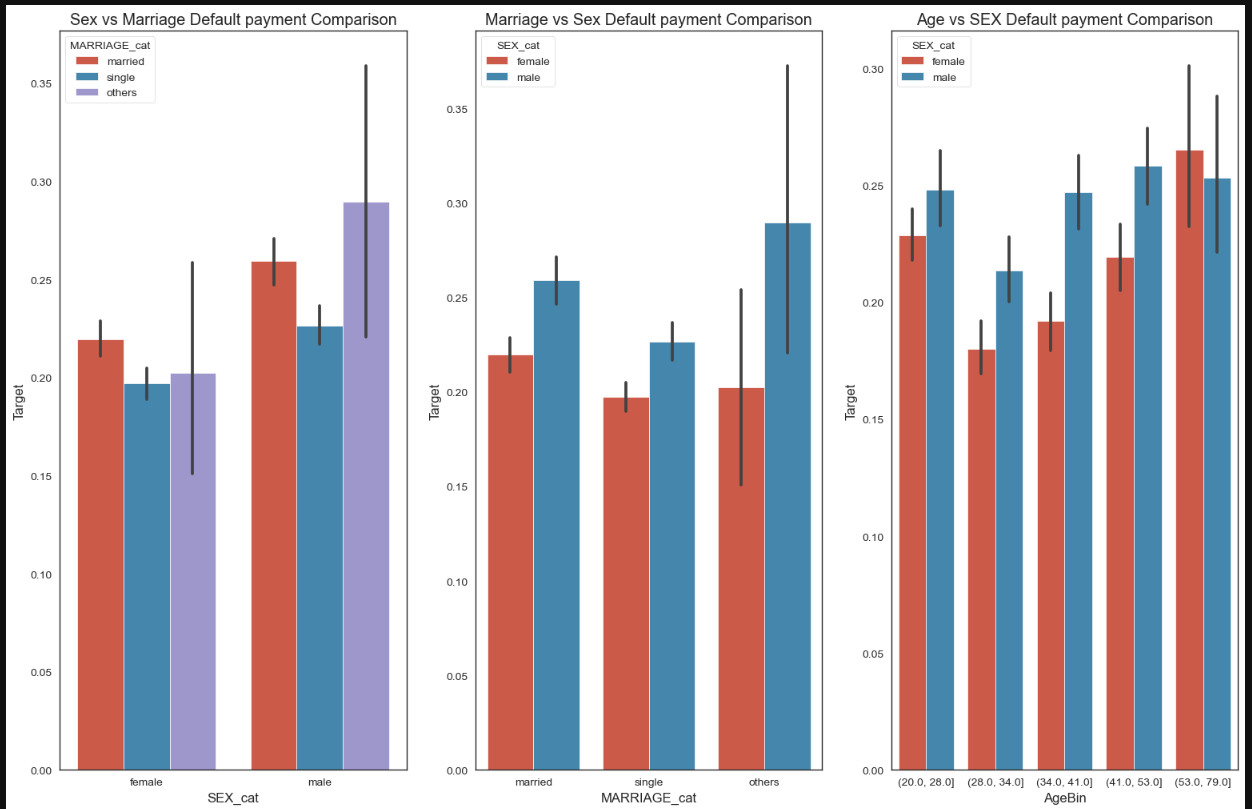

As we seen below low limit score mostly to get default  

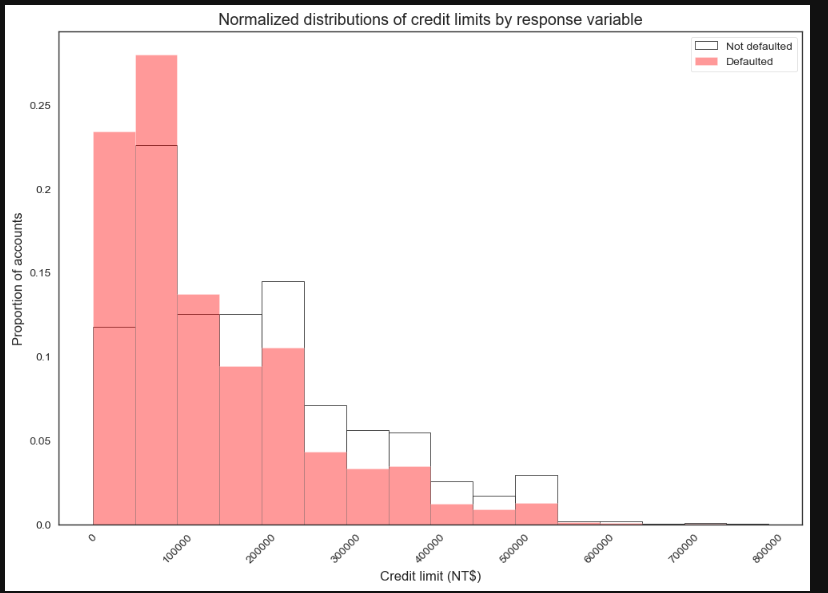


Pay_september status > 2 mostly gets defaulted 

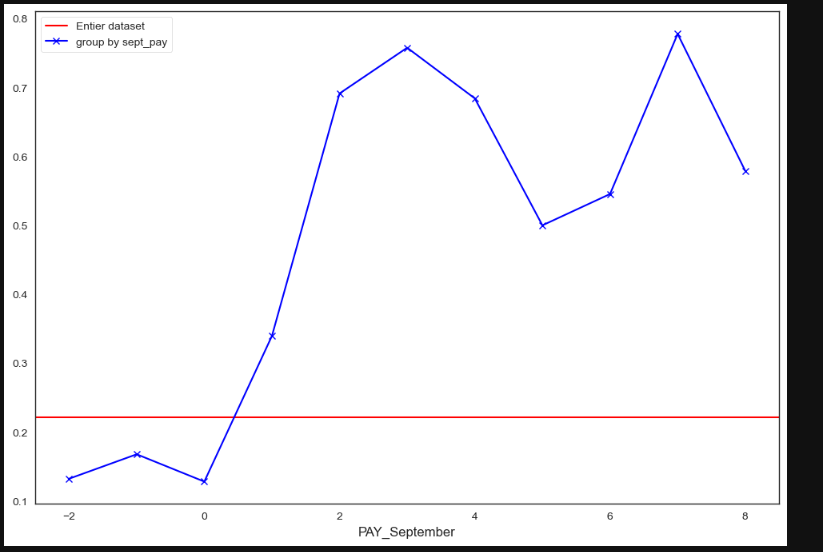

Predicting the Good feature for our model using ANOVA for All features vs Target. Pay_status features will impact more thaan others lets compare later with feature importance 
 

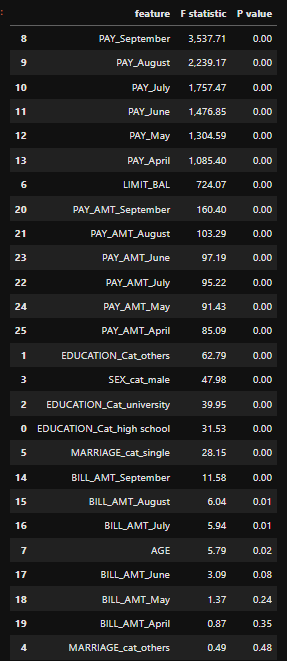

Top 25% feature are listed below to get good output

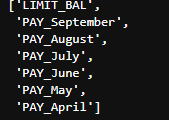